In [9]:
#%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, Image as IPImage

from PIL import Image

from ipywidgets import interact, Dropdown, IntText

import cv2
from skimage import feature
from scipy.stats import skew, kurtosis
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.decomposition import PCA
import numpy as np

from scipy import ndimage
from scipy.stats import skew, entropy
import cv2

from sklearn.feature_selection import VarianceThreshold

from MirrorExtractor.mirror_extractor import MirrorExtractor

In [10]:
def show_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_path.split('/')[-1])
    plt.show()

def mark_mirror_on_img(img_path, mirror_id):
    img = np.array(Image.open(img_path).convert('RGB'))

    x_coords, y_coords = extractor.get_coords(mirror_id)

    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(x_coords, y_coords, 'r-', lw=2, alpha=0.5)
    ax1.scatter(x_coords[:-1], y_coords[:-1], c='cyan', s=10, alpha=0.5)
    ax1.imshow(img)
    ax1.set_title(img_path.split('/')[-1])
    return ax1


In [5]:
! ls ../../data/webcam_useful_image/webcam_useful_images/image_2023-01-01_1200.jpg


ls: cannot access '../../data/webcam_useful_image/webcam_useful_images/image_2023-01-01_1200.jpg': No such file or directory


In [9]:
! ls ../data

IR_cam_check_plots
crossings_points.pkl
crossings_points.pkl:Zone.Identifier
crossings_points_IRCamM1T20250702_161000M.pkl
crossings_points_IRCamM1T20250702_161000M.pkl:Zone.Identifier
data
downolad_images.sh
images_description.txt
webcam_useful_image
webcam_useful_images-20251017T172853Z-1-001.zip
webcam_useful_images-20251017T172853Z-1-001.zip:Zone.Identifier


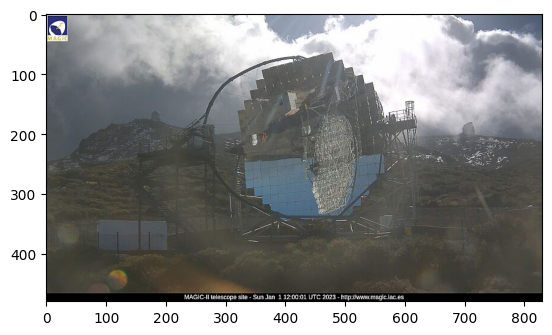

In [10]:
img_path = "../data/webcam_useful_image/webcam_useful_images/image_2023-01-01_1200.jpg"
img_path_adata = "/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/08/15/IRCamM1T20250815_095000M.jpg"
img = np.array(Image.open(img_path).convert('RGB'))
plt.imshow(img)

In [13]:
! ls ../data

IR_cam_check_plots
crossings_points.pkl
crossings_points.pkl:Zone.Identifier
crossings_points_IRCamM1T20250702_161000M.pkl
crossings_points_IRCamM1T20250702_161000M.pkl:Zone.Identifier
data
downolad_images.sh
images_description.txt
webcam_useful_image
webcam_useful_images-20251017T172853Z-1-001.zip
webcam_useful_images-20251017T172853Z-1-001.zip:Zone.Identifier


In [14]:
# Initialize
extractor = MirrorExtractor(
    "../data/crossings_points.pkl"
)

NameError: name 'img' is not defined

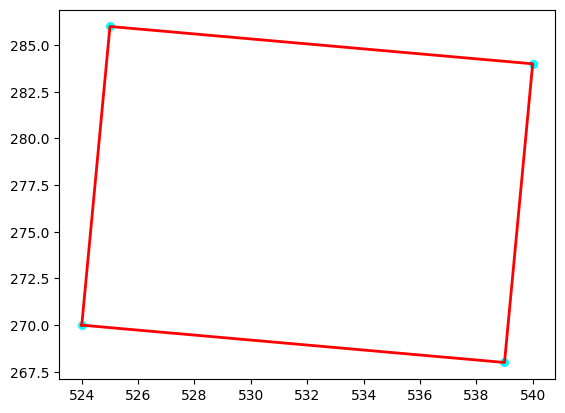

In [15]:
x_coords, y_coords = extractor.get_coords(235)

fig, ax1 = plt.subplots()
ax1.plot(x_coords, y_coords, 'r-', lw=2)
ax1.scatter(x_coords[:-1], y_coords[:-1], c='cyan', s=30)
ax1.imshow(img)

<Axes: title={'center': 'image_2024-05-21_1700.jpg'}>

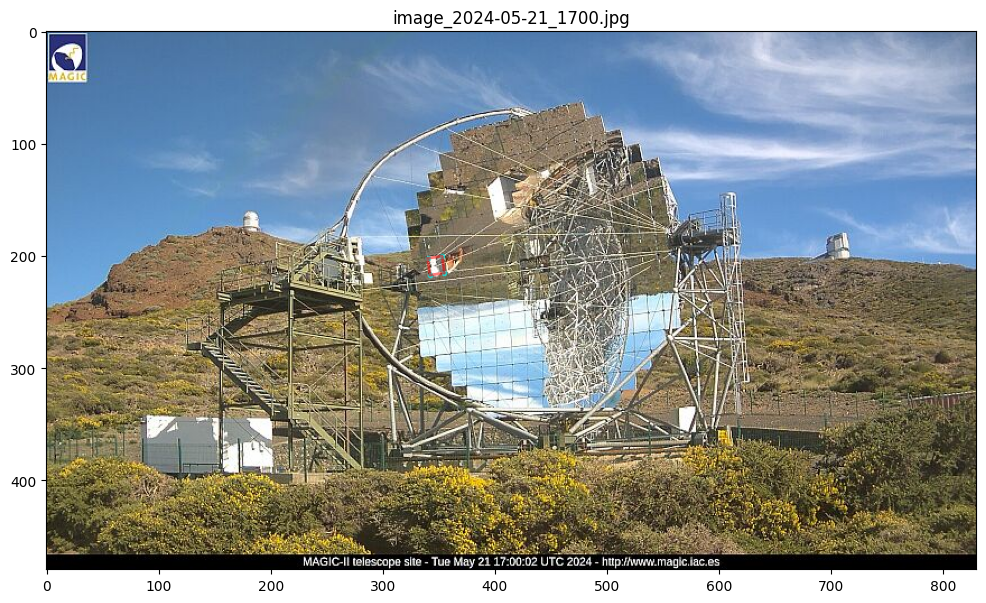

In [16]:
mark_mirror_on_img('../data/webcam_useful_image/webcam_useful_images/image_2024-05-21_1700.jpg', 120)

In [17]:
def extract_one_mirror_from_images(img_path_list, mirror_id, extractor):
    mirror_list = []
    for path in img_path_list:
        # print(path)
        img = np.array(Image.open(path).convert('RGB'))
        x_coords, y_coords = extractor.get_coords(mirror_id)
        cropped = extractor.extract_polygon_region_cv2(img, x_coords, y_coords)
        mirror_list.append(cropped)
    return mirror_list

In [18]:
img_list = glob.glob("../data/webcam_useful_image/webcam_useful_images/*.jpg")
# img_list = glob.glob("/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/07/05/IRCamM1T*1[7-9]*.jpg")
img_list[:10]

['../data/webcam_useful_image/webcam_useful_images/image_2024-05-09_1500.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2023-01-04_1600.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2024-05-07_1600.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2024-05-04_1000.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2024-05-21_1700.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2024-01-21_1600.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2023-01-05_1300.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2024-05-06_1400.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2024-01-28_1800.jpg',
 '../data/webcam_useful_image/webcam_useful_images/image_2024-05-19_1400.jpg']

In [19]:
# Create interactive dropdown
interact(
    show_image,
    image_path=Dropdown(
        options=img_list[:],
        description='Select:'
    )
)

interactive(children=(Dropdown(description='Select:', options=('../data/webcam_useful_image/webcam_useful_imag…

<function __main__.show_image(image_path)>

In [20]:
# Create interactive dropdown
interact(
    mark_mirror_on_img,
    img_path=Dropdown(
        options=img_list[:],
        description='Select:'
    ),
    mirror_id=IntText(
        value=12,
        min=0,
        max=290,
        description="Mirror id"
    )
)

interactive(children=(Dropdown(description='Select:', options=('../data/webcam_useful_image/webcam_useful_imag…

<function __main__.mark_mirror_on_img(img_path, mirror_id)>

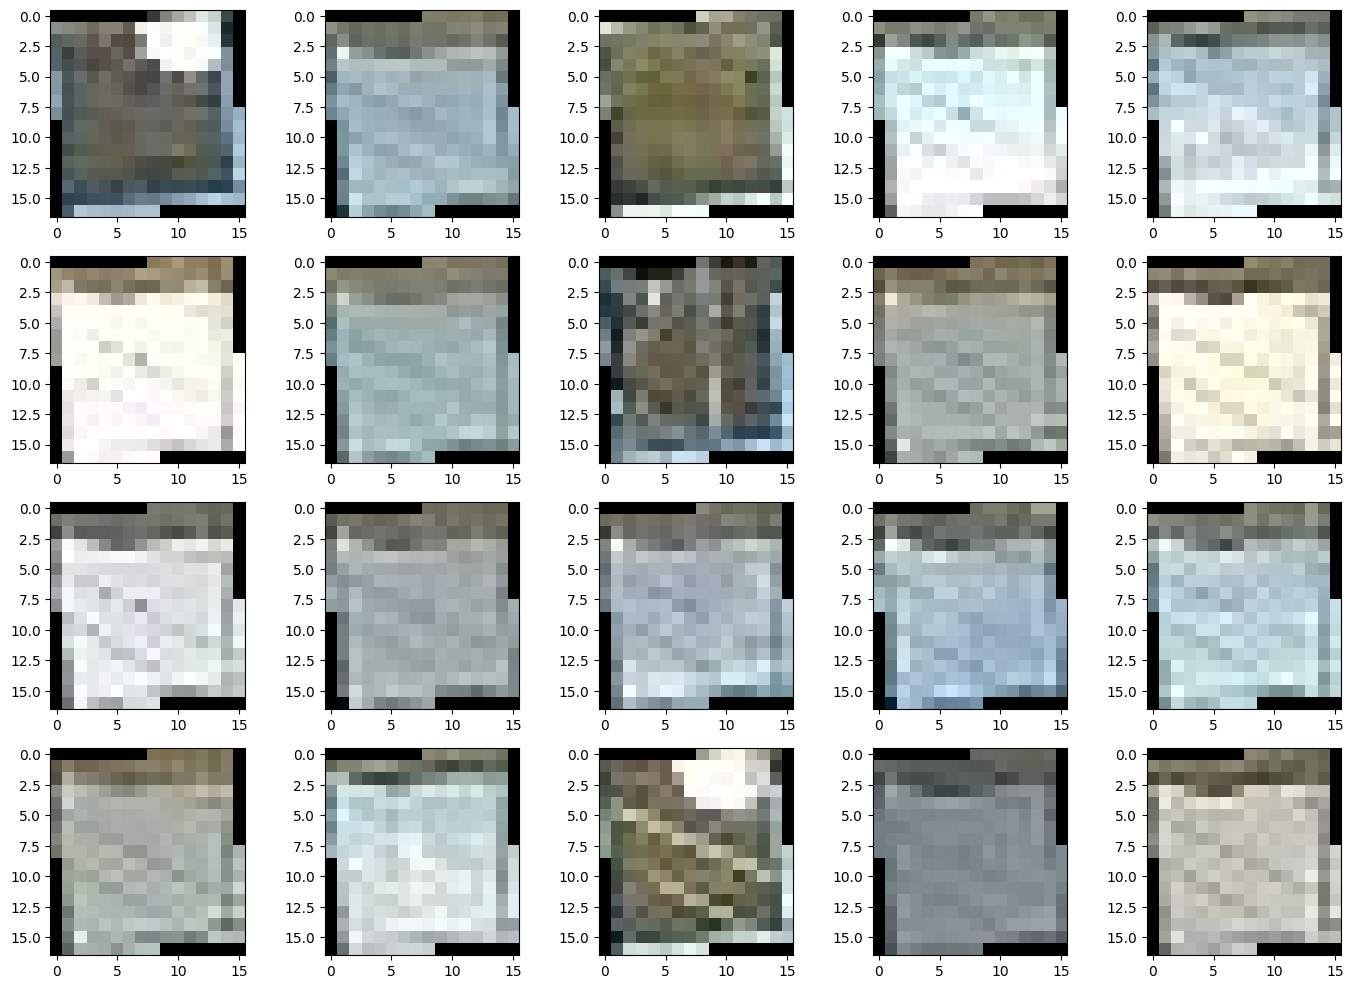

In [49]:
#extractor = MirrorExtractor("/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/crossings_points_IRCamM1T20250702_161000M.pkl")
extractor = MirrorExtractor("../data/crossings_points.pkl")

mirror_list = extract_one_mirror_from_images(img_list[:], 172, extractor)

fig, ax = plt.subplots(4, 5, figsize=(14, 10))
axes = ax.flatten()
for i in range(20):
    axes[i].imshow(mirror_list[i])

plt.tight_layout()

In [52]:
def extract_features(img):
    """Extract uncorrelated features from ~20x20 mirror image."""
    # Convert to different color spaces
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(float)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(float)
    
    features = {}
    
    # 1. Mean luminance
    features['luminance_mean'] = np.mean(gray)
    
    # 2. Saturation mean (HSV)
    features['saturation_mean'] = np.mean(hsv[:,:,1])
    
    # 3. Intensity variance (texture uniformity)
    features['intensity_var'] = np.var(gray)
    
    # 4. Gradient magnitude (edge/defect density)
    gx = ndimage.sobel(gray, axis=1)
    gy = ndimage.sobel(gray, axis=0)
    gradient_mag = np.sqrt(gx**2 + gy**2)
    features['gradient_mean'] = np.mean(gradient_mag)
    
    # 5. Skewness (asymmetry - spots create positive/negative skew)
    features['intensity_skew'] = skew(gray.flatten())
    
    # 6. Entropy (information content / randomness)
    hist, _ = np.histogram(gray, bins=32, range=(0, 255), density=True)
    features['entropy'] = entropy(hist + 1e-10)
    
    return features

In [53]:
mirror_list[2].shape

(17, 16, 3)

In [55]:
features = []
fir i in range(12):
    features.extend(extract_features(mirror_list[2]))

In [56]:
features 

{'luminance_mean': np.float64(108.08823529411765),
 'saturation_mean': np.float64(49.411764705882355),
 'intensity_var': np.float64(3198.7642733564016),
 'gradient_mean': np.float64(254.3659886605028),
 'intensity_skew': np.float64(0.23049670472484474),
 'entropy': np.float64(2.7044617339676145)}

In [71]:
path_list = [path.split("/")[-1] for path in img_list]

In [34]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def compute_mirror_features(mirror_list):
    """
    Oblicza cechy dla każdego lustra
    """
    features = []
    
    for mirror in mirror_list:
        feature_dict = {}
        
        # 1. Statystyki podstawowe dla każdego kanału RGB
        for i, color in enumerate(['R', 'G', 'B']):
            feature_dict[f'{color}_mean'] = np.mean(mirror[:, :, i])
            feature_dict[f'{color}_std'] = np.std(mirror[:, :, i])
            feature_dict[f'{color}_median'] = np.median(mirror[:, :, i])
            feature_dict[f'{color}_min'] = np.min(mirror[:, :, i])
            feature_dict[f'{color}_max'] = np.max(mirror[:, :, i])
        
        # 2. Jasność ogólna
        feature_dict['brightness'] = np.mean(mirror)
        feature_dict['brightness_std'] = np.std(mirror)
        
        # 3. Kontrast
        feature_dict['contrast'] = np.std(mirror)
        
        # 4. Entropia (miara "chaotyczności")
        hist, _ = np.histogram(mirror.flatten(), bins=256, range=(0, 256))
        hist = hist / hist.sum()
        hist = hist[hist > 0]
        feature_dict['entropy'] = -np.sum(hist * np.log2(hist))
        
        # 5. Dominujący kolor (RGB)
        feature_dict['dominant_R'] = np.percentile(mirror[:, :, 0], 75)
        feature_dict['dominant_G'] = np.percentile(mirror[:, :, 1], 75)
        feature_dict['dominant_B'] = np.percentile(mirror[:, :, 2], 75)
        
        # 6. Gradient (wykrywa krawędzie/wzory)
        gray = np.mean(mirror, axis=2)
        gradient_x = np.gradient(gray, axis=1)
        gradient_y = np.gradient(gray, axis=0)
        feature_dict['gradient_magnitude'] = np.mean(np.sqrt(gradient_x**2 + gradient_y**2))
        
        # 7. Liczba pikseli bardzo jasnych i bardzo ciemnych
        feature_dict['very_bright_ratio'] = np.sum(mirror > 200) / mirror.size
        feature_dict['very_dark_ratio'] = np.sum(mirror < 50) / mirror.size
        
        features.append(feature_dict)
    
    return features





In [36]:
path_list = glob.glob("../data/webcam_useful_image/webcam_useful_images/*.jpg")

In [37]:
mirror_features = compute_mirror_features(mirror_list)
df_mirror_features = pd.DataFrame(mirror_features)
df_mirror_features["name"] = path_list[:]
df_mirror_features.head()

,R_mean,R_std,R_median,R_min,R_max,G_mean,G_std,G_median,G_min,G_max,...,brightness_std,contrast,entropy,dominant_R,dominant_G,dominant_B,gradient_magnitude,very_bright_ratio,very_dark_ratio,name
0,132.616959,83.431606,181.0,0,247,141.584795,88.957889,193.5,0,253,...,90.214103,90.214103,4.929663,184.0,196.0,216.0,41.213675,0.280702,0.280702,../data/webcam_useful_image/webcam_useful_imag...
1,148.745614,93.584232,205.0,0,255,144.704678,91.133781,199.0,0,255,...,91.068681,91.068681,4.822400,209.0,204.0,198.0,43.001709,0.386940,0.280702,../data/webcam_useful_image/webcam_useful_imag...
2,76.894737,51.004363,98.0,0,204,99.166667,63.905850,132.0,0,232,...,68.421730,68.421730,5.400041,104.0,135.0,172.0,32.455529,0.022417,0.280702,../data/webcam_useful_image/webcam_useful_imag...
3,114.432749,72.345054,155.0,0,226,143.479532,90.092048,196.0,0,252,...,94.460290,94.460290,5.276876,158.0,199.0,244.0,41.237739,0.317739,0.280702,../data/webcam_useful_image/webcam_useful_imag...
4,106.470760,68.854181,136.5,0,211,127.371345,80.899617,169.0,0,241,...,83.912392,83.912392,5.619307,161.0,186.0,216.0,38.936722,0.170565,0.280702,../data/webcam_useful_image/webcam_useful_imag...


In [58]:
mirror_features[0]

{'R_mean': np.float64(132.6169590643275),
 'R_std': np.float64(83.43160559287675),
 'R_median': np.float64(181.0),
 'R_min': np.uint8(0),
 'R_max': np.uint8(247),
 'G_mean': np.float64(141.58479532163742),
 'G_std': np.float64(88.95788873196219),
 'G_median': np.float64(193.5),
 'G_min': np.uint8(0),
 'G_max': np.uint8(253),
 'B_mean': np.float64(153.91228070175438),
 'B_std': np.float64(96.50278559172342),
 'B_median': np.float64(212.0),
 'B_min': np.uint8(0),
 'B_max': np.uint8(255),
 'brightness': np.float64(142.7046783625731),
 'brightness_std': np.float64(90.21410269515228),
 'contrast': np.float64(90.21410269515228),
 'entropy': np.float64(4.929662612926197),
 'dominant_R': np.float64(184.0),
 'dominant_G': np.float64(196.0),
 'dominant_B': np.float64(216.0),
 'gradient_magnitude': np.float64(41.21367533388007),
 'very_bright_ratio': np.float64(0.2807017543859649),
 'very_dark_ratio': np.float64(0.2807017543859649)}

In [83]:
df_mirror_features = pd.DataFrame(mirror_features)
df_mirror_features["name"] = path_list[:]
df_mirror_features.head()

,R_mean,R_std,R_median,R_min,R_max,G_mean,G_std,G_median,G_min,G_max,...,brightness_std,contrast,entropy,dominant_R,dominant_G,dominant_B,gradient_magnitude,very_bright_ratio,very_dark_ratio,name
0,57.029582,23.173363,65.0,0,109,95.122511,37.864437,109.0,0,141,...,57.296976,57.296976,5.944730,68.0,113.0,177.0,8.288989,0.000144,0.136652,IRCamM1T20250705_173000M.jpg
1,59.694949,24.151957,68.0,0,108,96.700722,38.437587,111.0,0,142,...,57.428329,57.428329,5.887500,71.0,114.0,179.0,8.197061,0.000000,0.134969,IRCamM1T20250705_170000M.jpg
2,58.178211,23.593867,66.0,0,118,95.949062,38.159449,110.0,0,144,...,57.411903,57.411903,5.882060,69.0,114.0,178.0,8.226523,0.000000,0.135354,IRCamM1T20250705_171000M.jpg
3,57.837085,23.416626,66.0,0,113,95.454834,37.961605,110.0,0,142,...,57.351257,57.351257,5.861155,69.0,113.0,178.0,8.057981,0.000337,0.135209,IRCamM1T20250705_172000M.jpg
4,58.600866,23.865974,66.0,0,115,97.077489,38.689819,112.0,0,137,...,58.336220,58.336220,6.002237,70.0,115.0,180.0,8.800513,0.000529,0.136508,IRCamM1T20250705_174000M.jpg


In [38]:
df_mirror_features.keys()

Index(['R_mean', 'R_std', 'R_median', 'R_min', 'R_max', 'G_mean', 'G_std',
       'G_median', 'G_min', 'G_max', 'B_mean', 'B_std', 'B_median', 'B_min',
       'B_max', 'brightness', 'brightness_std', 'contrast', 'entropy',
       'dominant_R', 'dominant_G', 'dominant_B', 'gradient_magnitude',
       'very_bright_ratio', 'very_dark_ratio', 'name'],
      dtype='object')

In [40]:
df_mirror_features.describe()

,R_mean,R_std,R_median,R_min,R_max,G_mean,G_std,G_median,G_min,G_max,...,brightness,brightness_std,contrast,entropy,dominant_R,dominant_G,dominant_B,gradient_magnitude,very_bright_ratio,very_dark_ratio
count,380.000000,380.000000,380.000000,380.0,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,110.556440,70.271502,148.427632,0.0,214.586842,129.389397,81.534204,176.235526,0.0,230.286842,...,129.529481,84.484150,84.484150,5.076704,154.025658,180.649342,209.826974,37.932144,0.224605,0.280702
std,26.467256,16.175747,38.180976,0.0,28.980575,19.373824,11.985806,27.482240,0.0,26.486006,...,19.496677,11.082534,11.082534,0.428442,38.804664,28.258196,24.581769,5.165112,0.225849,0.000000
min,63.514620,40.105906,86.000000,0.0,128.000000,92.774854,58.110996,128.000000,0.0,148.000000,...,92.839181,61.758558,61.758558,2.601413,88.750000,130.000000,154.000000,26.059429,0.000000,0.280702
25%,88.400585,57.310082,115.000000,0.0,194.000000,113.883041,72.141114,154.000000,0.0,212.750000,...,113.932992,75.680120,75.680120,4.886162,121.000000,157.000000,191.000000,34.233030,0.024123,0.280702
50%,107.285088,68.072424,145.000000,0.0,216.000000,126.678363,79.995722,172.000000,0.0,239.000000,...,127.174951,82.277896,82.277896,5.204956,149.000000,176.000000,207.000000,37.215548,0.186647,0.280702
75%,125.578947,79.181583,170.000000,0.0,240.000000,144.107456,90.520466,196.250000,0.0,255.000000,...,144.155945,93.810385,93.810385,5.361464,176.000000,201.000000,228.000000,41.683986,0.342105,0.280702
max,182.070175,113.763995,254.000000,0.0,255.000000,182.122807,113.796073,254.000000,0.0,255.000000,...,181.991228,113.717062,113.717062,5.887773,255.000000,254.000000,255.000000,49.854535,0.719298,0.280702


In [41]:
corr = df_mirror_features[['R_mean', 'R_std', 'R_median', 'G_mean', 'G_std',
       'G_median', 'B_mean', 'B_std', 'B_median', 
        'brightness', 'brightness_std', 'contrast', 'entropy',
       'dominant_R', 'dominant_G', 'dominant_B', 'gradient_magnitude',
       'very_bright_ratio', 'very_dark_ratio']].corr()
corr.style.background_gradient(cmap='coolwarm')

/home/pgliwny/miniconda3/envs/cv/lib/python3.11/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/pgliwny/miniconda3/envs/cv/lib/python3.11/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,R_mean,R_std,R_median,G_mean,G_std,G_median,B_mean,B_std,B_median,brightness,brightness_std,contrast,entropy,dominant_R,dominant_G,dominant_B,gradient_magnitude,very_bright_ratio,very_dark_ratio
R_mean,1.000000,0.998414,0.995620,0.928423,0.925686,0.930227,0.589203,0.584559,0.596977,0.933381,0.862998,0.862998,-0.590445,0.997867,0.937036,0.594307,0.886013,0.836533,nan
R_std,0.998414,1.000000,0.989577,0.928717,0.928463,0.926225,0.593577,0.590483,0.597687,0.934048,0.867586,0.867586,-0.566673,0.996972,0.937432,0.598534,0.897291,0.841509,nan
R_median,0.995620,0.989577,1.000000,0.920273,0.914494,0.929970,0.573409,0.566988,0.587302,0.924053,0.848360,0.848360,-0.630834,0.991598,0.927971,0.578491,0.862714,0.822431,nan
G_mean,0.928423,0.928717,0.920273,1.000000,0.998836,0.995181,0.840240,0.836734,0.845550,0.998557,0.985161,0.985161,-0.404478,0.920274,0.997016,0.844061,0.964825,0.928622,nan
G_std,0.925686,0.928463,0.914494,0.998836,1.000000,0.990286,0.842699,0.840636,0.844766,0.997657,0.987504,0.987504,-0.383287,0.917817,0.995619,0.846152,0.974210,0.931360,nan
G_median,0.930227,0.926225,0.929970,0.995181,0.990286,1.000000,0.822391,0.816826,0.835008,0.992526,0.972566,0.972566,-0.454580,0.920568,0.991822,0.826866,0.941320,0.917888,nan
B_mean,0.589203,0.593577,0.573409,0.840240,0.842699,0.822391,1.000000,0.999480,0.996414,0.839142,0.911598,0.911598,0.016979,0.573912,0.820056,0.998040,0.842827,0.825253,nan
B_std,0.584559,0.590483,0.566988,0.836734,0.840636,0.816826,0.999480,1.000000,0.993976,0.835727,0.910544,0.910544,0.032832,0.569333,0.816339,0.997445,0.846392,0.825691,nan
B_median,0.596977,0.597687,0.587302,0.845550,0.844766,0.835008,0.996414,0.993976,1.000000,0.843364,0.910797,0.910797,-0.025481,0.580474,0.824982,0.994669,0.831622,0.825698,nan
brightness,0.933381,0.934048,0.924053,0.998557,0.997657,0.992526,0.839142,0.835727,0.843364,1.000000,0.985031,0.985031,-0.396162,0.925218,0.995528,0.842141,0.968477,0.928924,nan


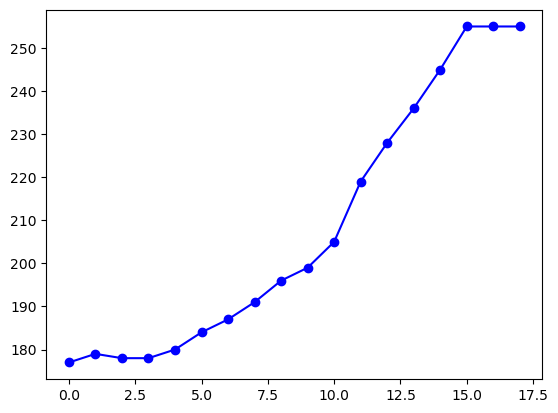

In [87]:
features_list = ["entropy", "dominant_B"]
plt.plot(df_mirror_features["dominant_B"], 'bo-')

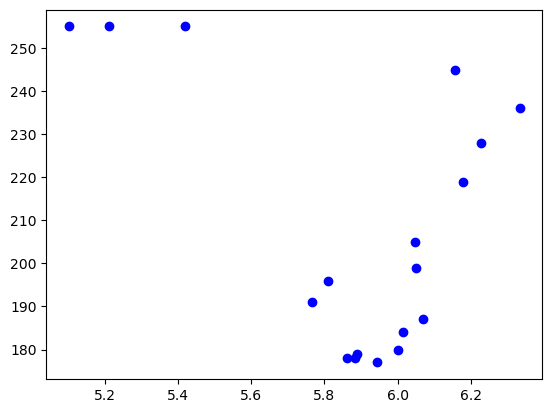

In [88]:
plt.plot(df_mirror_features["entropy"], df_mirror_features["dominant_B"], 'bo')

In [24]:
df_mirror_features.iloc[5]

R_mean                                   55.372222
R_std                                    32.100778
R_median                                      53.0
R_min                                            0
R_max                                          255
G_mean                                   55.372222
G_std                                    32.100778
G_median                                      53.0
G_min                                            0
G_max                                          255
B_mean                                   55.372222
B_std                                    32.100778
B_median                                      53.0
B_min                                            0
B_max                                          255
brightness                               55.372222
brightness_std                           32.100778
contrast                                 32.100778
entropy                                   6.449663
dominant_R                     

In [13]:
mirror_features[0]

{'R_mean': np.float64(83.28308823529412),
 'R_std': np.float64(40.35618994569967),
 'R_median': np.float64(89.0),
 'R_min': np.uint8(0),
 'R_max': np.uint8(240),
 'G_mean': np.float64(84.03308823529412),
 'G_std': np.float64(40.67268478379103),
 'G_median': np.float64(90.0),
 'G_min': np.uint8(0),
 'G_max': np.uint8(240),
 'B_mean': np.float64(73.9375),
 'B_std': np.float64(37.872169739913545),
 'B_median': np.float64(79.0),
 'B_min': np.uint8(0),
 'B_max': np.uint8(232),
 'brightness': np.float64(80.41789215686275),
 'brightness_std': np.float64(39.91852146988051),
 'contrast': np.float64(39.91852146988051),
 'entropy': np.float64(5.981538934906864),
 'dominant_R': np.float64(104.0),
 'dominant_G': np.float64(104.0),
 'dominant_B': np.float64(92.25),
 'gradient_magnitude': np.float64(32.15992544334488),
 'very_bright_ratio': np.float64(0.00980392156862745),
 'very_dark_ratio': np.float64(0.14460784313725492)}

In [33]:
features_names = list(mirror_features[0].keys())
X = np.array([[f[name] for name in features_names] for f in mirror_features])

# Usuń NaN i Inf
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
results = {}
selector = VarianceThreshold(threshold=0.1)
X_high_var = selector.fit_transform(X_scaled)
high_var_features = [features_names[i] for i in selector.get_support(indices=True)]
        
results['variance'] = {
        'features': high_var_features,
        'n_features': len(high_var_features),
        'X': X_high_var
        }
print(f"Cechy o wysokiej wariancji: {len(high_var_features)}")

Cechy o wysokiej wariancji: 22


In [17]:
X.shape

(20, 25)

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

outlier_scores = np.zeros(len(mirror_list))

In [50]:
z_scores = np.abs(stats.zscore(X_scaled, axis=0))
outlier_scores = np.mean(z_scores, axis=1)
outliers = outlier_scores > 2
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [20]:
X[:, 2]

array([ 89. , 103. , 108.5, 127. , 109. , 150. , 126. ,  82. , 121. ,
       108.5, 107. , 112. , 112. , 109. , 122. , 127. , 110.5, 108. ,
        97. , 104. ])

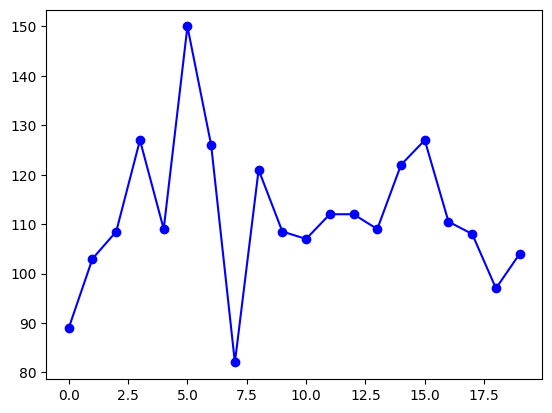

In [21]:
plt.plot(X[:, 2], 'bo-')

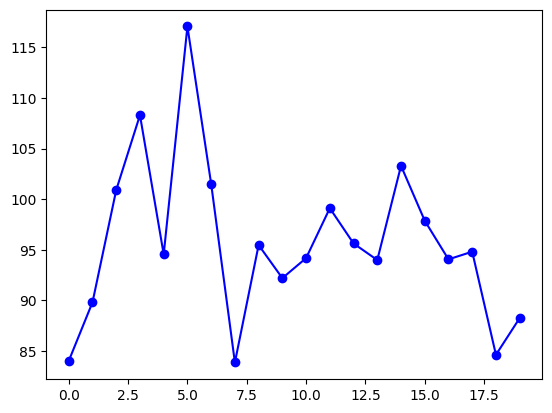

In [23]:
plt.plot(X[:, 5], 'bo-')


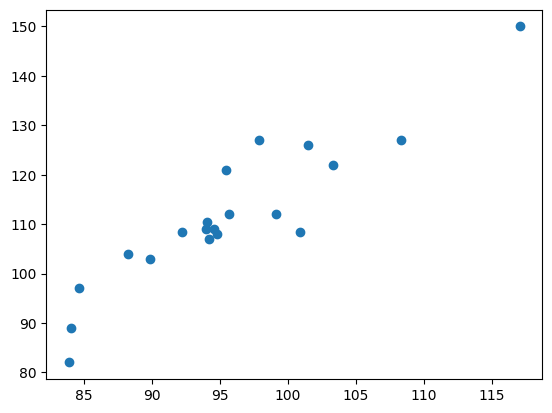

In [24]:
plt.scatter(X[:, 5], X[:, 2])


# Adwanced features

In [ ]:
def get_rgb_features(mirror_list):
    feat = {}
    for mirror in mirror_list:
        # Normalizowane proporcje RGB (suma = 1)
        mean_rgb = np.mean(mirror, axis=(0, 1))
        rgb_sum = np.sum(mean_rgb)
        if rgb_sum > 0:
            feat['r_ratio'] = mean_rgb[0] / rgb_sum
            feat['g_ratio'] = mean_rgb[1] / rgb_sum
            feat['b_ratio'] = mean_rgb[2] / rgb_sum
        
        # Stosunek kolorów (niezależny od jasności)
        feat['rg_ratio'] = mean_rgb[0] / (mean_rgb[1] + 1e-6)
        feat['rb_ratio'] = mean_rgb[0] / (mean_rgb[2] + 1e-6)
        feat['gb_ratio'] = mean_rgb[1] / (mean_rgb[2] + 1e-6)

    return feat